In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

from scipy.stats import percentileofscore
from scipy import stats

In [ ]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
import tensorflow as tf

In [ ]:
# Define loss func
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [ ]:
!apt install unixodbc-dev
!pip install pyodbc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unixodbc-dev is already the newest version (2.3.4-1.1ubuntu3).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
pip install pymc3==3.9.2

In [ ]:
!pip install pandas==0.25.3

In [ ]:
import pandas.io.sql
import pyodbc

In [ ]:
df = pd.read_csv("/content/Data1207.csv")
df = df[~df['lastSemesterAvg'].isin([0, 1])]

df.head()

,MSSV,CurrentTerm,Major,Gender,Fail,overAllAvg,lastSemesterAvg,Classifier,overAllAvgMath,overAllAvgIt,overAllAvgOther
0,SE04218,9,BSE,Female,13,5.349123,6.52,Average,5.60,5.950000,5.195455
1,SB02007,8,BBA,Male,4,6.338462,5.84,Average,4.50,6.800000,6.363889
2,SB01241,9,BFB,Female,5,6.151786,7.40,Average,5.70,8.400000,6.126415
3,HE130587,5,IA,Male,9,4.976667,5.58,Average,6.25,5.460000,4.760870
4,SE04723,9,BSE,Male,9,5.406818,6.90,Average,3.50,5.527273,5.553333


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())



Column Name: MSSV
SB02259     1
SE04664     1
HE141402    1
HE140156    1
SE04002     1
           ..
HE130538    1
HE140726    1
SE04088     1
SE06122     1
HE130847    1
Name: MSSV, Length: 3477, dtype: int64

Column Name: Major
BSE                            1346
SE                             1110
BBA                             289
BIA                             228
BA                              107
IA                              107
BFB                              86
CS                               59
BEC                              35
BIB                              30
Truyền thông đa phương tiện      22
IB                               19
MC                               19
BGD                               7
BCS                               3
FB                                2
Unknown                           2
BMC                               1
JS                                1
IBA                               1
Software Engineering              1
JPL         

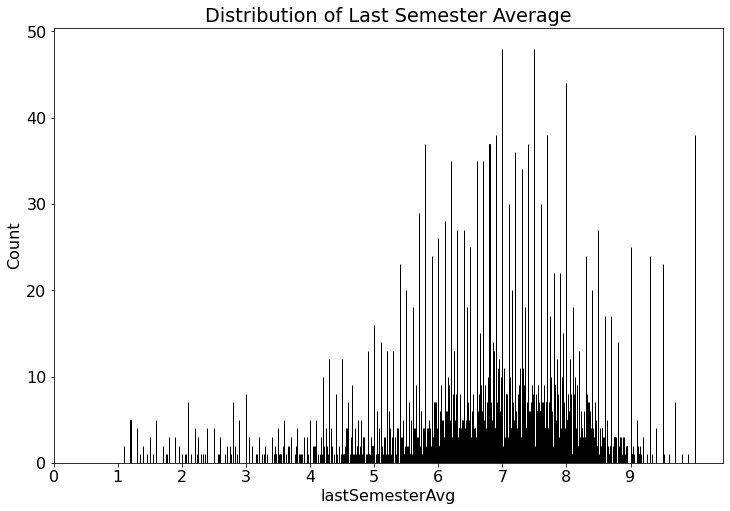

In [ ]:
plt.bar(df['lastSemesterAvg'].value_counts().index, 
        df['lastSemesterAvg'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1/df.shape[0])
plt.xlabel('lastSemesterAvg'); plt.ylabel('Count'); plt.title('Distribution of Last Semester Average');
plt.xticks(list(range(0, 10)));

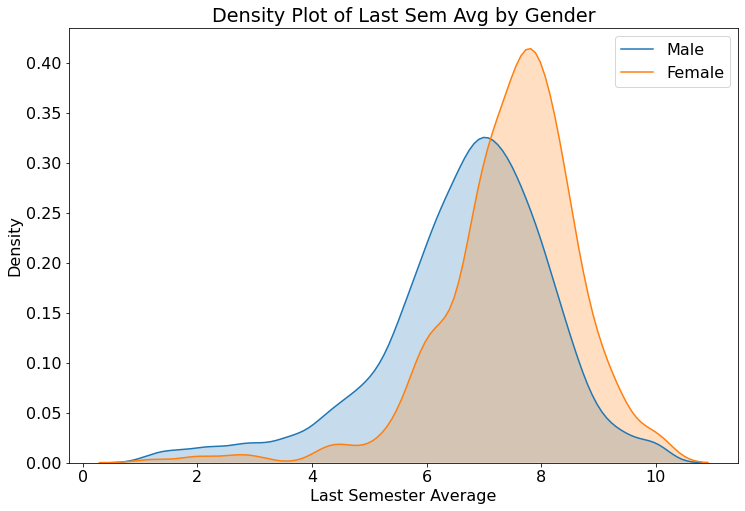

In [ ]:
sns.kdeplot(df.loc[df['Gender'] == 'Male', 'lastSemesterAvg'], label = 'Male', shade = True)
sns.kdeplot(df.loc[df['Gender'] == 'Female', 'lastSemesterAvg'], label = 'Female', shade = True)
plt.xlabel('Last Semester Average'); plt.ylabel('Density'); plt.title('Density Plot of Last Sem Avg by Gender');


In [ ]:
# Calculate percentile for grades
df['percentile'] = df['lastSemesterAvg'].apply(lambda x: percentileofscore(df['lastSemesterAvg'], x))

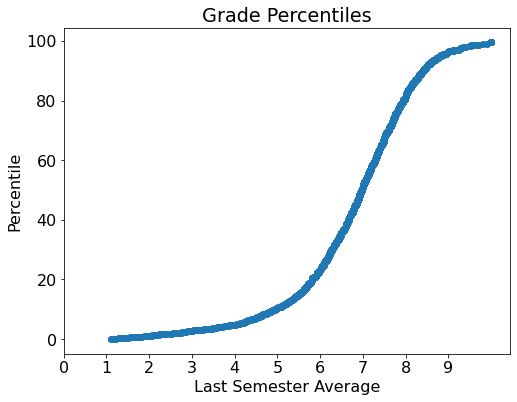

In [ ]:
# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['lastSemesterAvg'], df['percentile'], 'o')
plt.xticks(range(0, 10, 1), range(0, 10, 1))
plt.xlabel('Last Semester Average'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [ ]:
print('50th percentile score:', np.min(df.loc[df['percentile'] > 50, 'lastSemesterAvg']))
print('Minimum Score needed for 90th percentile:', np.min(df.loc[df['percentile'] > 90, 'lastSemesterAvg']))

50th percentile score: 6.975
Minimum Score needed for 90th percentile: 8.41666666666667


In [ ]:
df.corr()['lastSemesterAvg'].sort_values()

Fail              -0.401748
overAllAvgMath     0.266672
overAllAvgIt       0.314495
CurrentTerm        0.359059
overAllAvgOther    0.445630
overAllAvg         0.529366
percentile         0.935004
lastSemesterAvg    1.000000
Name: lastSemesterAvg, dtype: float64

In [ ]:
df = df.drop(columns="MSSV")
df = df.drop(columns="Classifier")
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['lastSemesterAvg'] = df['lastSemesterAvg']
dummy_df.head()

,Major_Assurance Information,Major_BA,Major_BBA,Major_BCS,Major_BEC,Major_BFB,Major_BGD,Major_BIA,Major_BIB,Major_BMC,Major_BSE,Major_CS,Major_FB,Major_IA,Major_IB,Major_IBA,Major_JPL,Major_JS,Major_MC,Major_SE,Major_Software Engineering,Major_Truyền thông đa phương tiện,Major_Unknown,Gender_Female,Gender_Male,lastSemesterAvg
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.52
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.84
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.40
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5.58
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.90


In [ ]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['lastSemesterAvg'].sort_values()

Gender_Male                         -0.174527
Major_SE                            -0.171446
Major_Software Engineering          -0.018890
Major_MC                            -0.015836
Major_JS                            -0.015159
Major_JPL                           -0.003774
Major_BCS                           -0.001897
Major_Unknown                        0.000075
Major_BMC                            0.002349
Major_BIA                            0.004279
Major_CS                             0.004659
Major_Assurance Information          0.006942
Major_IBA                            0.008090
Major_BEC                            0.015180
Major_IA                             0.017039
Major_BFB                            0.028624
Major_BGD                            0.034415
Major_FB                             0.036612
Major_Truyền thông đa phương tiện    0.041669
Major_IB                             0.043791
Major_BA                             0.050588
Major_BBA                         

In [ ]:
def format_data(df):
    # Targets are final grade of student
    labels = df['lastSemesterAvg']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['percentile'])
    
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['lastSemesterAvg'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:9]
    
    df = df.loc[:, most_correlated.index]
    
#     Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.2,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,lastSemesterAvg,overAllAvg,overAllAvgOther,Fail,CurrentTerm,overAllAvgIt,overAllAvgMath,Gender_Male,Gender_Female
2678,6.380000,4.928333,5.163415,17,9,4.306250,5.033333,1,0
1206,8.175000,7.073077,6.954167,1,5,8.100000,8.900000,0,1
3437,4.100000,4.147368,4.100000,8,2,4.000000,5.200000,1,0
3243,5.780000,5.097778,5.059375,11,8,5.618182,2.850000,1,0
611,7.785714,6.092308,7.200000,3,2,0.000000,0.000000,1,0


In [ ]:
# Rename variables in train and teste
X_train = X_train.rename(columns={'lastSemesterAvg': 'Last_Sem_Avg', 
                                  'overAllAvg': 'Overall_Avg'})

X_test = X_test.rename(columns={'lastSemesterAvg': 'Last_Sem_Avg', 
                                  'overAllAvg': 'Overall_Avg'})

In [ ]:
X_train.head()

,Last_Sem_Avg,Overall_Avg,overAllAvgOther,Fail,CurrentTerm,overAllAvgIt,overAllAvgMath,Gender_Male,Gender_Female
2678,6.380000,4.928333,5.163415,17,9,4.306250,5.033333,1,0
1206,8.175000,7.073077,6.954167,1,5,8.100000,8.900000,0,1
3437,4.100000,4.147368,4.100000,8,2,4.000000,5.200000,1,0
3243,5.780000,5.097778,5.059375,11,8,5.618182,2.850000,1,0
611,7.785714,6.092308,7.200000,3,2,0.000000,0.000000,1,0


In [ ]:
print(X_train.shape)
print(X_test.shape)

(2781, 9)
(696, 9)


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


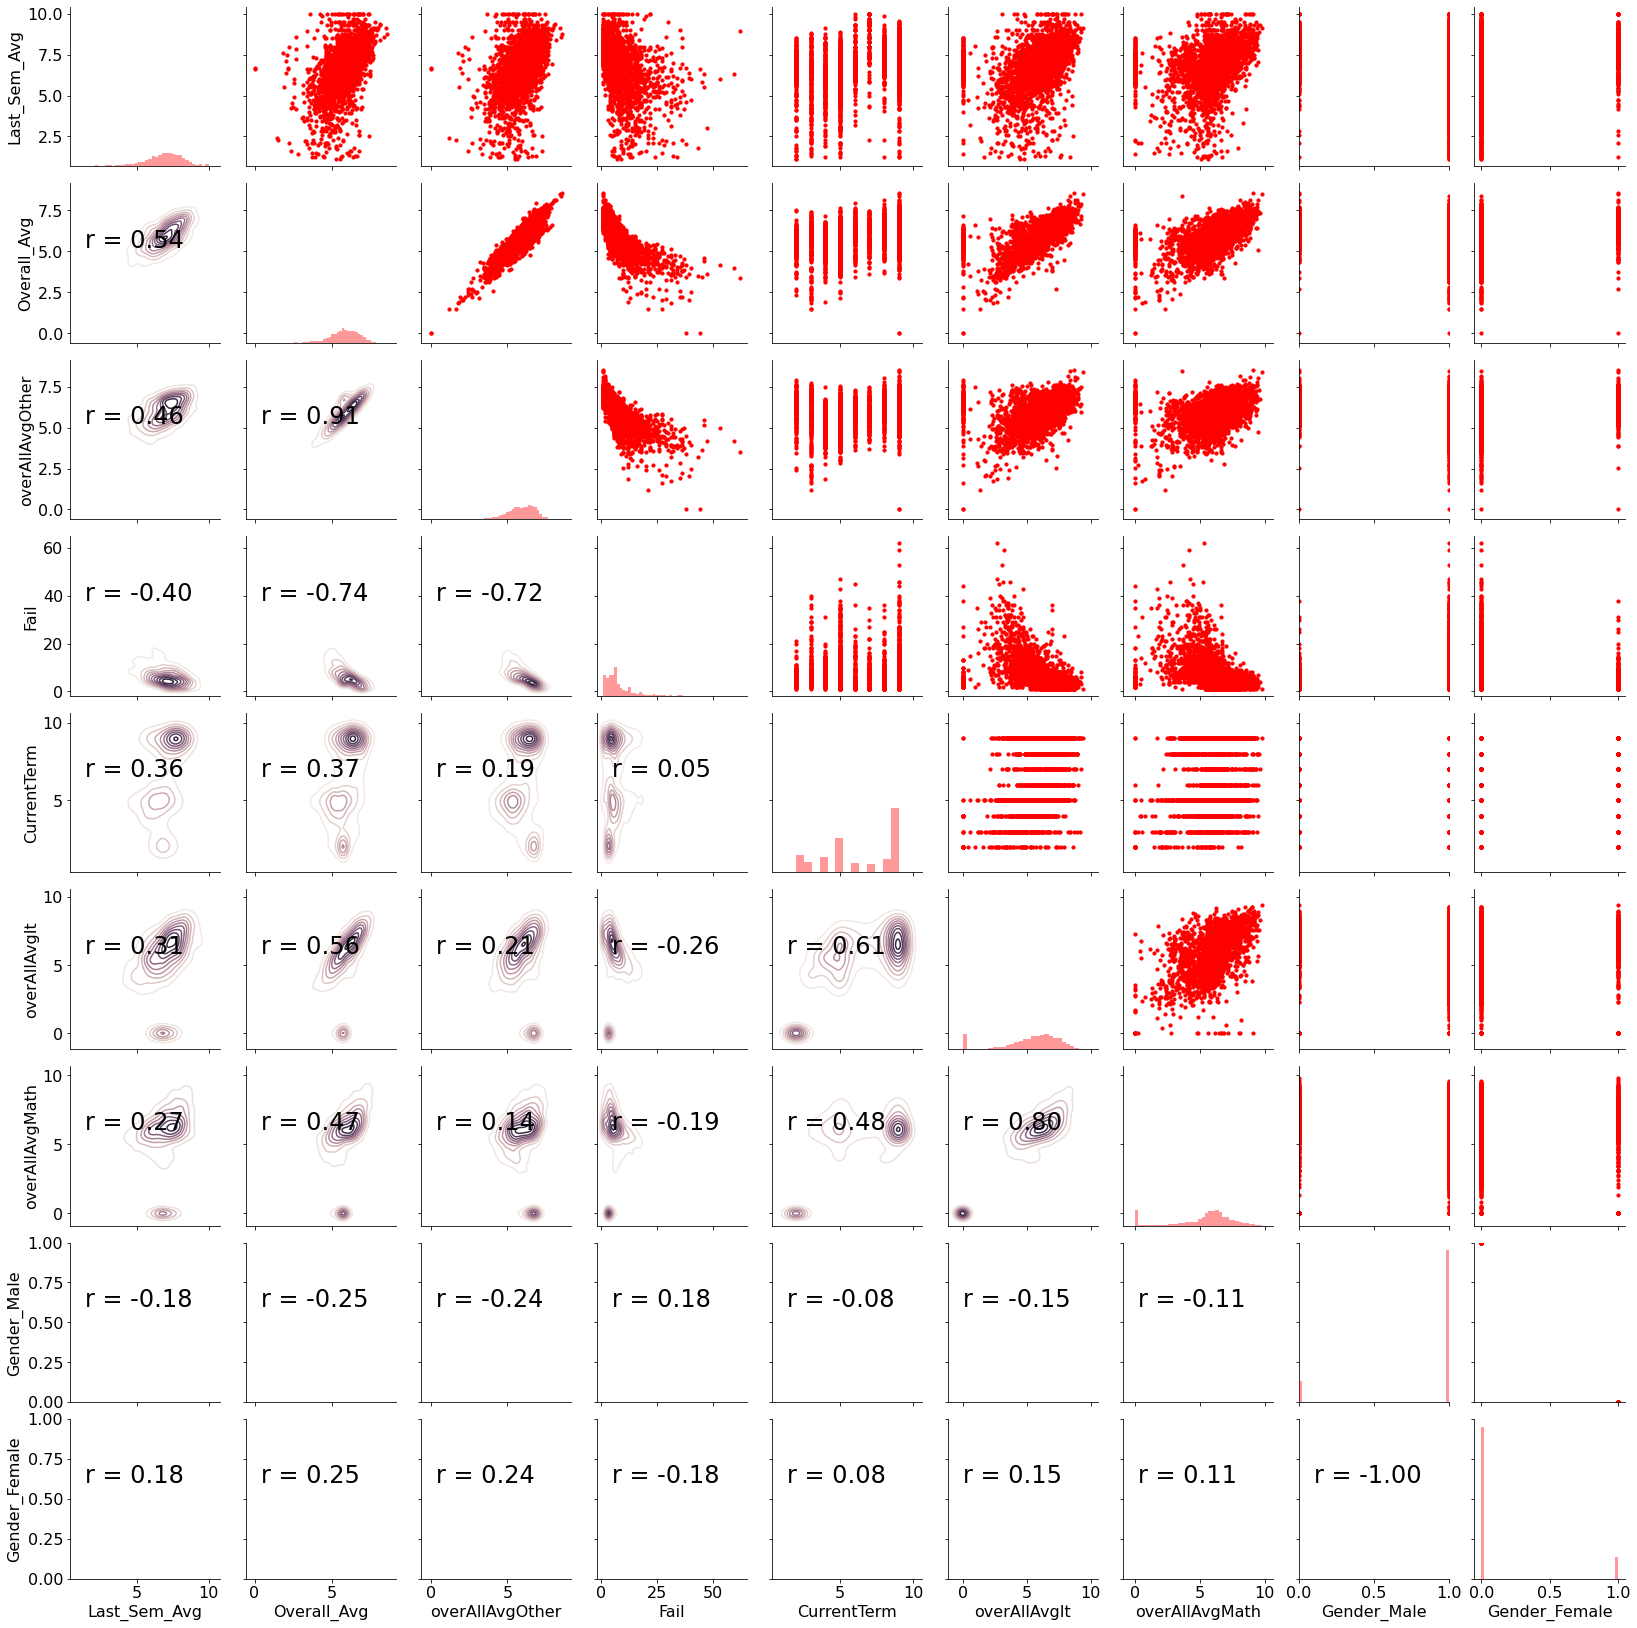

In [ ]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [ ]:
# Create relation to the median grade column
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['Last_Sem_Avg'] >= 5)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
X_plot = X_plot.drop(columns='Last_Sem_Avg')

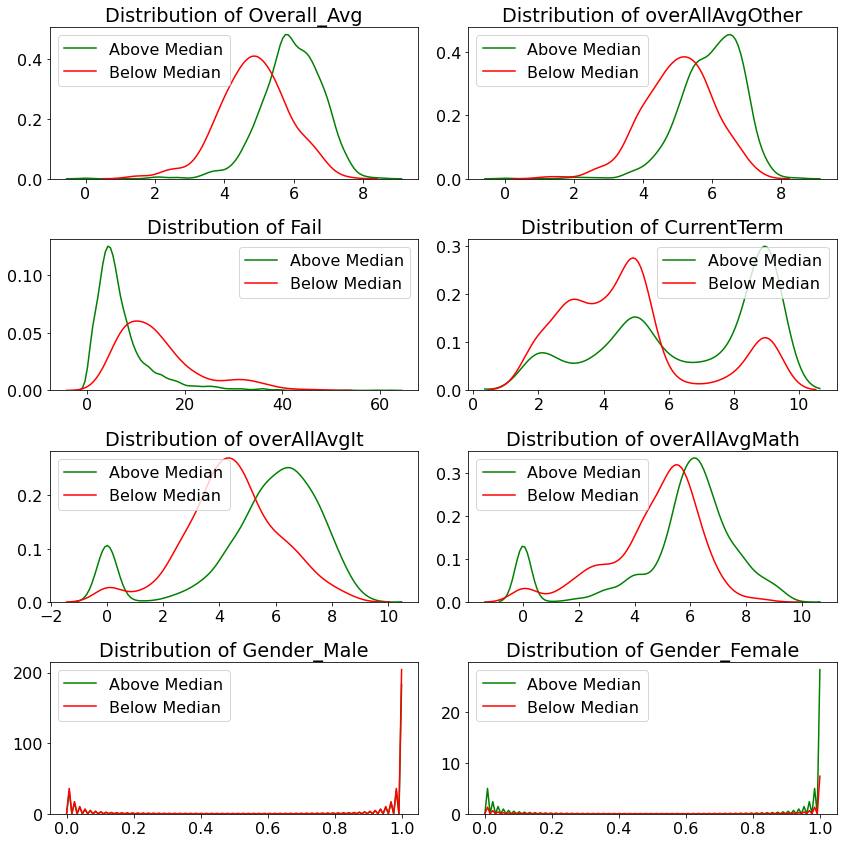

In [ ]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green')
    sns.kdeplot(subset_below[col], label = 'Below Median', color = 'red')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

In [ ]:

# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [ ]:
# Naive baseline is the median
median_pred = X_train['Last_Sem_Avg'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Last_Sem_Avg']

In [ ]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 1.0625
Median Baseline RMSE: 1.4476


In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Last_Sem_Avg')
    X_test = X_test.drop(columns='Last_Sem_Avg')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)

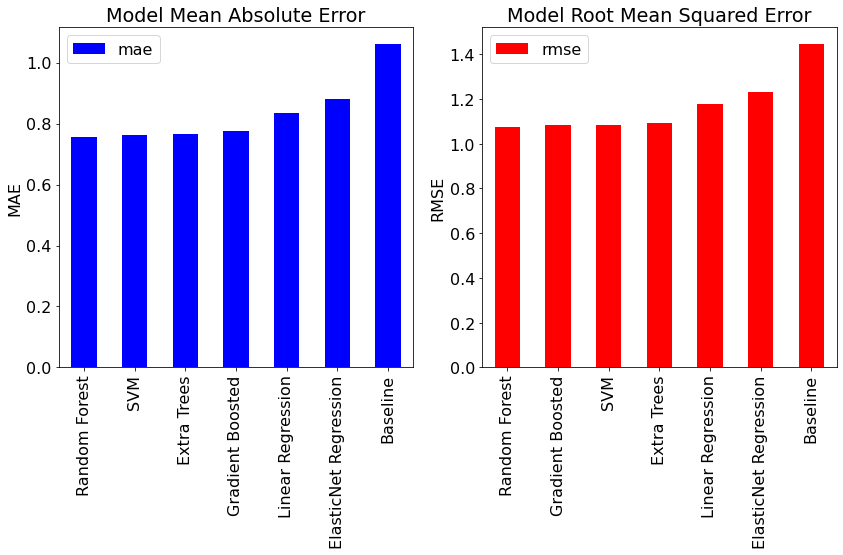

In [ ]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [ ]:
results

,mae,rmse
Linear Regression,0.833586,1.17722
ElasticNet Regression,0.881269,1.23119
Random Forest,0.756418,1.07499
Extra Trees,0.765214,1.09223
SVM,0.763932,1.08526
Gradient Boosted,0.776224,1.08343
Baseline,1.06254,1.44765


In [ ]:
print('The SVM regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['SVM', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The SVM regressor is 28.10% better than the baseline.


In [ ]:
# Formula from Ordinary Least Squares Linear Regression
lr = LinearRegression()
lr.fit(X_train.drop(columns='Last_Sem_Avg'), y_train)

ols_formula = 'Last semester avg = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Last semester avg = 3.43 + 2.22 * Overall_Avg + -1.44 * overAllAvgOther + -0.03 * Fail + 0.22 * CurrentTerm + -0.33 * overAllAvgIt + -0.05 * overAllAvgMath + -0.17 * Gender_Male + 0.17 * Gender_Female'

In [ ]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Last_Sem_Avg ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Last_Sem_Avg ~ Overall_Avg + overAllAvgOther + Fail + CurrentTerm + overAllAvgIt + overAllAvgMath + Gender_Male + Gender_Female'

In [ ]:
import pymc3 as pm

In [ ]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 3, tune = 2000, cores=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sd, Gender_Female, Gender_Male, overAllAvgMath, overAllAvgIt, CurrentTerm, Fail, overAllAvgOther, Overall_Avg, Intercept]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 3271 seconds.
The acceptance probability does not match the target. It is 0.9171869779712876, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [ ]:
pip install arviz

In [ ]:
plot_trace(normal_trace);

In [ ]:
pm.traceplot(normal_trace);

In [ ]:
pm.forestplot(normal_trace);

In [ ]:

pm.plot_posterior(normal_trace, figsize = (14, 14));

In [ ]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

In [ ]:
pm.summary(normal_trace)


In [ ]:

model_formula = 'Last semester average = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

In [ ]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

In [ ]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)

In [ ]:
all_model_results


In [ ]:
# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['Last_Sem_Avg']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('Last_Sem_Avg')
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 0.5, 
               linestyles = '--', colors = 'red',
               label = 'True Grade',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 0.5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Last_Sem_Avg'); plt.ylabel('Density');
    
    # Prediction information
    print('True Grade = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

In [ ]:
test_model(normal_trace, X_test.iloc[1])

In [ ]:
test_model(normal_trace, X_test.iloc[16])

In [ ]:
# Make predictions for a new data point from the model trace
def query_model(trace, new_observation):
    
    # Print information about the new observation
    print('New Observation')
    print(new_observation)
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Standard deviation
    sd_value = var_dict['sd'].mean()
    
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Align weights and new observation
    var_weights = var_weights[new_observation.index]
    
    # Means of variables
    var_means = var_weights.mean(axis=0)
    
    # Mean for observation
    mean_loc = np.dot(var_means, new_observation)
    
    # Distribution of estimates
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)
    
    # Plot the estimate distribution
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 1, 
               linestyles = '-', colors = 'orange', linewidth = 2.5)
    plt.title('Density Plot for New Observation');
    plt.xlabel('Last_Sem_Avg'); plt.ylabel('Density');
    
    # Estimate information
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

In [ ]:
observation = pd.Series({'Intercept': 1,"Overall_Avg": 6.638000, "overAllAvgOther": 6.617778,
                          "Fail":2.000000, "CurrentTerm": 9.000000, "overAllAvgIt": 6.866667,
                          "overAllAvgMath": 6.750000, "Gender_Female": 1.000000})
query_model(normal_trace, observation)